In [1]:
import sys
import pandas

import numpy

from matplotlib import pyplot
from matplotlib import dates
from matplotlib import ticker

from scipy import stats

In [2]:
%matplotlib inline

# data input
[NOAIG](http://www.gein.noa.gr/services/full_catalogue.php)

In [3]:
df = pandas.read_csv(
    'full_catalogue.php', header=None, skiprows=2, sep='\s+', 
    names=['year', 'month', 'day', 'hour', 'minute', 'second', 'latitude', 'longitude', 'depth', 'magnitude']
)

In [4]:
df

,year,month,day,hour,minute,second,latitude,longitude,depth,magnitude
0,1964,FEB,24,23,30,25.0,38.9000,23.9000,10,5.3
1,1964,APR,11,16,0,0.0,39.7500,25.2500,10,5.7
2,1964,APR,21,8,14,40.0,38.5000,22.2500,10,4.5
3,1964,APR,24,3,49,58.0,38.0000,21.8000,10,5.0
4,1964,APR,29,4,21,0.0,39.2500,23.7500,10,5.8
...,...,...,...,...,...,...,...,...,...,...
313611,2021,APR,11,19,46,24.0,39.7495,23.4970,16,2.1
313612,2021,APR,11,21,42,29.2,38.1189,23.3313,13,2.1
313613,2021,APR,11,21,59,54.8,37.6053,20.4922,18,2.0
313614,2021,APR,11,22,13,39.7,39.7774,22.0326,6,1.5


## data conversions

In [5]:
df.index.name = 'id'

### datetime

month abbreviations to integers:

In [6]:
import calendar

month_abbr_as_ints = dict((x,y) for (y,x) in enumerate(calendar.month_abbr))
month_abbr_as_ints

{'': 0,
 'Jan': 1,
 'Feb': 2,
 'Mar': 3,
 'Apr': 4,
 'May': 5,
 'Jun': 6,
 'Jul': 7,
 'Aug': 8,
 'Sep': 9,
 'Oct': 10,
 'Nov': 11,
 'Dec': 12}

In [7]:
df['month'] = df['month'].str.title()

In [8]:
df

,year,month,day,hour,minute,second,latitude,longitude,depth,magnitude
id,,,,,,,,,,
0,1964,Feb,24,23,30,25.0,38.9000,23.9000,10,5.3
1,1964,Apr,11,16,0,0.0,39.7500,25.2500,10,5.7
2,1964,Apr,21,8,14,40.0,38.5000,22.2500,10,4.5
3,1964,Apr,24,3,49,58.0,38.0000,21.8000,10,5.0
4,1964,Apr,29,4,21,0.0,39.2500,23.7500,10,5.8
...,...,...,...,...,...,...,...,...,...,...
313611,2021,Apr,11,19,46,24.0,39.7495,23.4970,16,2.1
313612,2021,Apr,11,21,42,29.2,38.1189,23.3313,13,2.1
313613,2021,Apr,11,21,59,54.8,37.6053,20.4922,18,2.0


In [9]:
df['month'].replace(month_abbr_as_ints, inplace=True)

In [10]:
df

,year,month,day,hour,minute,second,latitude,longitude,depth,magnitude
id,,,,,,,,,,
0,1964,2,24,23,30,25.0,38.9000,23.9000,10,5.3
1,1964,4,11,16,0,0.0,39.7500,25.2500,10,5.7
2,1964,4,21,8,14,40.0,38.5000,22.2500,10,4.5
3,1964,4,24,3,49,58.0,38.0000,21.8000,10,5.0
4,1964,4,29,4,21,0.0,39.2500,23.7500,10,5.8
...,...,...,...,...,...,...,...,...,...,...
313611,2021,4,11,19,46,24.0,39.7495,23.4970,16,2.1
313612,2021,4,11,21,42,29.2,38.1189,23.3313,13,2.1
313613,2021,4,11,21,59,54.8,37.6053,20.4922,18,2.0


create datetime strings:

In [11]:
df['datetime'] = (
    df['year'].astype(str) + '-' + 
    df['month'].astype(str) + '-' +
    df['day'].astype(str) + ' ' +
    df['hour'].astype(str) + ':' +
    df['minute'].astype(str) + ':' +
    df['second'].astype(str)
)

In [12]:
df

,year,month,day,hour,minute,second,latitude,longitude,depth,magnitude,datetime
id,,,,,,,,,,,
0,1964,2,24,23,30,25.0,38.9000,23.9000,10,5.3,1964-2-24 23:30:25.0
1,1964,4,11,16,0,0.0,39.7500,25.2500,10,5.7,1964-4-11 16:0:0.0
2,1964,4,21,8,14,40.0,38.5000,22.2500,10,4.5,1964-4-21 8:14:40.0
3,1964,4,24,3,49,58.0,38.0000,21.8000,10,5.0,1964-4-24 3:49:58.0
4,1964,4,29,4,21,0.0,39.2500,23.7500,10,5.8,1964-4-29 4:21:0.0
...,...,...,...,...,...,...,...,...,...,...,...
313611,2021,4,11,19,46,24.0,39.7495,23.4970,16,2.1,2021-4-11 19:46:24.0
313612,2021,4,11,21,42,29.2,38.1189,23.3313,13,2.1,2021-4-11 21:42:29.2
313613,2021,4,11,21,59,54.8,37.6053,20.4922,18,2.0,2021-4-11 21:59:54.8


drop unnecessary columns:

In [13]:
df.drop(columns = ['year', 'month', 'day', 'hour', 'minute', 'second'], inplace = True)

In [14]:
df

,latitude,longitude,depth,magnitude,datetime
id,,,,,
0,38.9000,23.9000,10,5.3,1964-2-24 23:30:25.0
1,39.7500,25.2500,10,5.7,1964-4-11 16:0:0.0
2,38.5000,22.2500,10,4.5,1964-4-21 8:14:40.0
3,38.0000,21.8000,10,5.0,1964-4-24 3:49:58.0
4,39.2500,23.7500,10,5.8,1964-4-29 4:21:0.0
...,...,...,...,...,...
313611,39.7495,23.4970,16,2.1,2021-4-11 19:46:24.0
313612,38.1189,23.3313,13,2.1,2021-4-11 21:42:29.2
313613,37.6053,20.4922,18,2.0,2021-4-11 21:59:54.8


In [15]:
df.dtypes

latitude     float64
longitude    float64
depth          int64
magnitude    float64
datetime      object
dtype: object

datetime strings to datetime64 objects:

In [16]:
df['datetime'] = pandas.to_datetime(df['datetime'])

In [17]:
df

,latitude,longitude,depth,magnitude,datetime
id,,,,,
0,38.9000,23.9000,10,5.3,1964-02-24 23:30:25.000
1,39.7500,25.2500,10,5.7,1964-04-11 16:00:00.000
2,38.5000,22.2500,10,4.5,1964-04-21 08:14:40.000
3,38.0000,21.8000,10,5.0,1964-04-24 03:49:58.000
4,39.2500,23.7500,10,5.8,1964-04-29 04:21:00.000
...,...,...,...,...,...
313611,39.7495,23.4970,16,2.1,2021-04-11 19:46:24.000
313612,38.1189,23.3313,13,2.1,2021-04-11 21:42:29.200
313613,37.6053,20.4922,18,2.0,2021-04-11 21:59:54.800


In [18]:
df.dtypes

latitude            float64
longitude           float64
depth                 int64
magnitude           float64
datetime     datetime64[ns]
dtype: object

### index
datetime becomes dataframe's new index:

In [19]:
df = df.reset_index().set_index('datetime')

In [20]:
df

,id,latitude,longitude,depth,magnitude
datetime,,,,,
1964-02-24 23:30:25.000,0,38.9000,23.9000,10,5.3
1964-04-11 16:00:00.000,1,39.7500,25.2500,10,5.7
1964-04-21 08:14:40.000,2,38.5000,22.2500,10,4.5
1964-04-24 03:49:58.000,3,38.0000,21.8000,10,5.0
1964-04-29 04:21:00.000,4,39.2500,23.7500,10,5.8
...,...,...,...,...,...
2021-04-11 19:46:24.000,313611,39.7495,23.4970,16,2.1
2021-04-11 21:42:29.200,313612,38.1189,23.3313,13,2.1
2021-04-11 21:59:54.800,313613,37.6053,20.4922,18,2.0


### cumulative events

In [21]:
df['event'] = 1
df['event'] = df['event'].cumsum()

In [22]:
df

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1964-02-24 23:30:25.000,0,38.9000,23.9000,10,5.3,1
1964-04-11 16:00:00.000,1,39.7500,25.2500,10,5.7,2
1964-04-21 08:14:40.000,2,38.5000,22.2500,10,4.5,3
1964-04-24 03:49:58.000,3,38.0000,21.8000,10,5.0,4
1964-04-29 04:21:00.000,4,39.2500,23.7500,10,5.8,5
...,...,...,...,...,...,...
2021-04-11 19:46:24.000,313611,39.7495,23.4970,16,2.1,313612
2021-04-11 21:42:29.200,313612,38.1189,23.3313,13,2.1,313613
2021-04-11 21:59:54.800,313613,37.6053,20.4922,18,2.0,313614


## data range

*As data source on seismicity, we used the Greek SI-NOA (Seismolo-gical Institute, National Observatory of Athens) catalog for 15 years from 1982 to 1996. Thespace window 20–25°E and 36–40°N was applied, and, because some 98% of earthquakes wereof shallow depth of less than 50 km, no lower limit on hypocenter depths was set on. To use a surface wave magnitude (M_s) as usually defined, we added 0.5 to the local magnitudes (M_L) reportedby SI-NOA (Geller, 1996b).*

In [23]:
df_papr = df['1982-01-01 00:00:00':'1996-12-31 23:59:59'].copy()

In [24]:
df_papr

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-01 00:44:01.000,9999,38.80,25.10,10,3.4,10000
1982-01-01 03:08:17.000,10000,38.70,22.40,10,3.3,10001
1982-01-01 04:05:20.000,10001,38.60,22.40,10,3.0,10002
1982-01-02 19:02:12.000,10002,38.80,25.10,10,3.5,10003
1982-01-03 19:35:11.000,10003,38.80,24.90,10,3.6,10004
...,...,...,...,...,...,...
1996-12-30 13:17:39.500,28320,38.21,26.12,10,3.5,28321
1996-12-30 16:50:20.700,28321,38.19,22.56,10,2.5,28322
1996-12-30 17:44:48.300,28322,37.07,20.64,10,2.9,28323


In [25]:
df_papr

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-01 00:44:01.000,9999,38.80,25.10,10,3.4,10000
1982-01-01 03:08:17.000,10000,38.70,22.40,10,3.3,10001
1982-01-01 04:05:20.000,10001,38.60,22.40,10,3.0,10002
1982-01-02 19:02:12.000,10002,38.80,25.10,10,3.5,10003
1982-01-03 19:35:11.000,10003,38.80,24.90,10,3.6,10004
...,...,...,...,...,...,...
1996-12-30 13:17:39.500,28320,38.21,26.12,10,3.5,28321
1996-12-30 16:50:20.700,28321,38.19,22.56,10,2.5,28322
1996-12-30 17:44:48.300,28322,37.07,20.64,10,2.9,28323


In [26]:
filtr = (df_papr['longitude'] >= 20.0) & (df['longitude'] <= 25.0 )
df_papr = df_papr.loc[filtr]
filtr = (df_papr['latitude'] >= 36.0) & (df['latitude'] <= 40.0 )
df_papr = df_papr.loc[filtr]

In [27]:
df_papr

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-01 03:08:17.000,10000,38.70,22.40,10,3.3,10001
1982-01-01 04:05:20.000,10001,38.60,22.40,10,3.0,10002
1982-01-03 19:35:11.000,10003,38.80,24.90,10,3.6,10004
1982-01-03 19:49:22.000,10004,38.80,24.90,10,3.3,10005
1982-01-03 23:29:48.000,10005,38.60,20.70,10,3.4,10006
...,...,...,...,...,...,...
1996-12-29 03:19:32.300,28313,36.28,21.79,39,3.2,28314
1996-12-30 08:42:30.700,28318,37.45,20.79,1,4.0,28319
1996-12-30 16:50:20.700,28321,38.19,22.56,10,2.5,28322


In [28]:
df_papr['magnitude'] = df_papr['magnitude'].map(lambda x: x + 0.5)

In [29]:
df_papr

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-01 03:08:17.000,10000,38.70,22.40,10,3.8,10001
1982-01-01 04:05:20.000,10001,38.60,22.40,10,3.5,10002
1982-01-03 19:35:11.000,10003,38.80,24.90,10,4.1,10004
1982-01-03 19:49:22.000,10004,38.80,24.90,10,3.8,10005
1982-01-03 23:29:48.000,10005,38.60,20.70,10,3.9,10006
...,...,...,...,...,...,...
1996-12-29 03:19:32.300,28313,36.28,21.79,39,3.7,28314
1996-12-30 08:42:30.700,28318,37.45,20.79,1,4.5,28319
1996-12-30 16:50:20.700,28321,38.19,22.56,10,3.0,28322


In [30]:
df_papr['event'] = 1
df_papr['event'] = df_papr['event'].cumsum()

In [31]:
df_papr

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-01 03:08:17.000,10000,38.70,22.40,10,3.8,1
1982-01-01 04:05:20.000,10001,38.60,22.40,10,3.5,2
1982-01-03 19:35:11.000,10003,38.80,24.90,10,4.1,3
1982-01-03 19:49:22.000,10004,38.80,24.90,10,3.8,4
1982-01-03 23:29:48.000,10005,38.60,20.70,10,3.9,5
...,...,...,...,...,...,...
1996-12-29 03:19:32.300,28313,36.28,21.79,39,3.7,11316
1996-12-30 08:42:30.700,28318,37.45,20.79,1,4.5,11317
1996-12-30 16:50:20.700,28321,38.19,22.56,10,3.0,11318


# paper reproduction

## figure 3

*Variation of the monthly number of all reported earthquakes with known magnitudes in the Peloponnesos–Aegean region for the interval of 15 years of 1982–1996. <br> Dashed line: regression line fitted to data, its slope: 1.8±0.7.*

In [32]:
assert df_papr['id'].count() == df_papr['event'].max()

number of events per year:

In [33]:
df_papr_fig3 = df_papr['id'].resample('M').count()

plot creation:

In [34]:
df_papr_fig3

datetime
1982-01-31    182
1982-02-28     75
1982-03-31     59
1982-04-30     98
1982-05-31     81
             ... 
1996-08-31    140
1996-09-30     74
1996-10-31    133
1996-11-30     71
1996-12-31     97
Freq: M, Name: id, Length: 180, dtype: int64

use ‘linregress’ function from SciPy statistics package for the linear regression

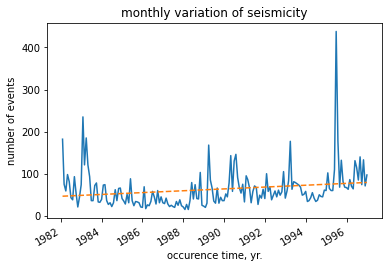

In [35]:
(fig3, ax3) = pyplot.subplots()

x_fig3 = df_papr_fig3.index
y_fig3 = df_papr_fig3

date_major_formatter_fig3 = dates.DateFormatter('%Y')
date_minor_formatter_fig3 = dates.DateFormatter('%M')

ax3.plot_date(x_fig3, y_fig3, linestyle='solid', markersize=0)

ax3.set_title('monthly variation of seismicity')
ax3.set_xlabel('occurence time, yr.')
ax3.set_ylabel('number of events')

ax3.xaxis.set_major_formatter(date_major_formatter_fig3)
ax3.xaxis.set_minor_formatter(date_minor_formatter_fig3)

fig3.autofmt_xdate()

ax3.tick_params(which='minor', color='r')

ax3.grid(False)

# SciPy statistics *linregress()* for linear regression

y_fig3_nparray = numpy.array(y_fig3.values, dtype=float)
x_fig3_nparray = numpy.array(x_fig3.values, dtype=float)

(slope_fig3, intercept_fig3, r_value_fig3, p_value_fig3, std_error_fig3) = stats.linregress(x_fig3_nparray, y_fig3_nparray)

xf_fig3 = numpy.linspace(min(x_fig3_nparray), max(x_fig3_nparray), 100)
xf_fig3_copy = xf_fig3.copy()
xf_fig3_copy = pandas.to_datetime(xf_fig3_copy)
yf_fig3 = (slope_fig3 * xf_fig3) + intercept_fig3

ax3.plot(xf_fig3_copy, yf_fig3, linestyle='--')

In [36]:
(slope_fig3, intercept_fig3, r_value_fig3, p_value_fig3, std_error_fig3)

(6.943365440606146e-17,
 20.08097460199687,
 0.20454669328633385,
 0.005880947223241363,
 2.4905010255798637e-17)

## figure 5

*Variations of the cumulative number of events versus time, in six magnitude bands in the Peloponnesos-Aegean area. <br> Dots indicate occurrences of large (M≥6.0) earthquakes.*

### dataframe slicing

In [37]:
df_papr

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-01 03:08:17.000,10000,38.70,22.40,10,3.8,1
1982-01-01 04:05:20.000,10001,38.60,22.40,10,3.5,2
1982-01-03 19:35:11.000,10003,38.80,24.90,10,4.1,3
1982-01-03 19:49:22.000,10004,38.80,24.90,10,3.8,4
1982-01-03 23:29:48.000,10005,38.60,20.70,10,3.9,5
...,...,...,...,...,...,...
1996-12-29 03:19:32.300,28313,36.28,21.79,39,3.7,11316
1996-12-30 08:42:30.700,28318,37.45,20.79,1,4.5,11317
1996-12-30 16:50:20.700,28321,38.19,22.56,10,3.0,11318


In [40]:
df_papr.dtypes

id             int64
latitude     float64
longitude    float64
depth          int64
magnitude    float64
event          int64
dtype: object

0.0 < magnitude ≤ 3.6

In [47]:
filtr = (df_papr['magnitude'] > 0) & (df_papr['magnitude'] <= 3.4)
df_papr_fig5a = df_papr[filtr].copy()

In [50]:
df_papr_fig5a

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-12 08:32:41.000,10039,38.40,23.20,10,3.4,6545
1982-01-22 09:12:01.000,10166,38.60,24.90,10,3.4,529396
1982-01-27 04:17:07.000,10189,38.60,24.80,10,3.4,790244
1982-01-27 19:22:57.000,10192,38.20,23.10,10,3.4,833340
1982-01-31 02:44:32.000,10203,38.60,24.40,10,3.4,955860
...,...,...,...,...,...,...
1996-12-24 11:00:26.500,28293,38.08,23.14,14,2.8,240993953134
1996-12-24 19:50:44.400,28294,38.63,22.07,8,3.2,241057894220
1996-12-30 16:50:20.700,28321,38.19,22.56,10,3.0,241697927240


In [51]:
df_papr_fig5a['event'] = 1
df_papr_fig5a['event'] = df_papr_fig5a['event'].cumsum()

In [52]:
df_papr_fig5a

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-12 08:32:41.000,10039,38.40,23.20,10,3.4,1
1982-01-22 09:12:01.000,10166,38.60,24.90,10,3.4,2
1982-01-27 04:17:07.000,10189,38.60,24.80,10,3.4,3
1982-01-27 19:22:57.000,10192,38.20,23.10,10,3.4,4
1982-01-31 02:44:32.000,10203,38.60,24.40,10,3.4,5
...,...,...,...,...,...,...
1996-12-24 11:00:26.500,28293,38.08,23.14,14,2.8,3348
1996-12-24 19:50:44.400,28294,38.63,22.07,8,3.2,3349
1996-12-30 16:50:20.700,28321,38.19,22.56,10,3.0,3350


3.5 < magnitude ≤ 3.9

In [56]:
filtr = (df_papr['magnitude'] >= 3.5) & (df_papr['magnitude'] <= 3.9)
df_papr_fig5b = df_papr[filtr].copy()

In [57]:
df_papr_fig5b['event'] = 1
df_papr_fig5b['event'] = df_papr_fig5b['event'].cumsum()

In [58]:
df_papr_fig5b

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-01 03:08:17.000,10000,38.70,22.40,10,3.8,1
1982-01-01 04:05:20.000,10001,38.60,22.40,10,3.5,2
1982-01-03 19:49:22.000,10004,38.80,24.90,10,3.8,3
1982-01-03 23:29:48.000,10005,38.60,20.70,10,3.9,4
1982-01-04 04:01:26.000,10006,38.90,25.00,10,3.7,5
...,...,...,...,...,...,...
1996-12-26 21:23:55.700,28303,38.76,21.70,1,3.8,5180
1996-12-27 02:29:06.800,28304,39.21,22.04,1,3.9,5181
1996-12-28 11:49:31.200,28308,38.73,20.68,1,3.7,5182


4.0 < magnitude ≤ 4.4

In [60]:
filtr = (df_papr['magnitude'] >= 4.0) & (df_papr['magnitude'] <= 4.4)
df_papr_fig5c = df_papr[filtr].copy()

In [61]:
df_papr_fig5c['event'] = 1
df_papr_fig5c['event'] = df_papr_fig5c['event'].cumsum()

In [62]:
df_papr_fig5c

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-03 19:35:11.000,10003,38.80,24.90,10,4.1,1
1982-01-04 09:56:37.000,10008,38.90,24.80,10,4.2,2
1982-01-05 08:29:27.000,10014,38.90,24.90,10,4.2,3
1982-01-06 00:30:51.000,10016,38.90,24.80,10,4.0,4
1982-01-06 16:44:53.000,10020,38.80,20.80,10,4.0,5
...,...,...,...,...,...,...
1996-12-17 11:49:00.700,28251,36.80,24.18,24,4.1,2187
1996-12-17 13:24:45.600,28252,39.00,22.21,84,4.0,2188
1996-12-20 02:14:47.200,28267,36.88,22.75,13,4.2,2189


4.5 < magnitude ≤ 4.9

In [63]:
filtr = (df_papr['magnitude'] >= 4.5) & (df_papr['magnitude'] <= 4.9)
df_papr_fig5d = df_papr[filtr].copy()

In [64]:
df_papr_fig5d['event'] = 1
df_papr_fig5d['event'] = df_papr_fig5d['event'].cumsum()

In [65]:
df_papr_fig5d

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-05 00:21:10.000,10012,38.80,24.90,10,4.6,1
1982-01-05 00:30:33.000,10013,38.90,24.90,10,4.9,2
1982-01-08 22:20:18.000,10028,38.90,24.70,10,4.6,3
1982-01-09 07:59:41.000,10029,38.50,21.90,10,4.5,4
1982-01-09 08:16:31.000,10030,38.50,21.90,10,4.7,5
...,...,...,...,...,...,...
1996-11-22 21:05:47.200,28100,40.00,20.80,1,4.5,452
1996-12-03 18:05:10.900,28160,39.88,20.22,8,4.9,453
1996-12-13 16:52:34.600,28202,37.02,23.76,2,4.5,454


magnitude ≥ 5.0

In [66]:
filtr = (df_papr['magnitude'] >= 5.0)
df_papr_fig5e = df_papr[filtr].copy()

In [67]:
df_papr_fig5e['event'] = 1
df_papr_fig5e['event'] = df_papr_fig5e['event'].cumsum()

In [68]:
df_papr_fig5e

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-18 19:27:23.000,10059,39.90,24.50,10,6.9,1
1982-01-18 19:31:14.000,10060,39.80,24.20,10,5.7,2
1982-01-18 20:00:04.000,10066,39.70,24.30,10,5.3,3
1982-01-18 20:00:52.000,10067,39.80,24.30,10,5.4,4
1982-01-19 12:18:15.000,10119,39.90,24.40,10,5.3,5
...,...,...,...,...,...,...
1995-10-01 06:22:39.900,25264,36.88,21.40,30,5.1,133
1996-06-06 16:25:35.800,26667,37.55,21.11,2,5.4,134
1996-10-09 09:46:33.700,27841,36.78,21.46,33,5.2,135


all data

In [69]:
df_papr_fig5f = df_papr.copy()
df_papr_fig5f

,id,latitude,longitude,depth,magnitude,event
datetime,,,,,,
1982-01-01 03:08:17.000,10000,38.70,22.40,10,3.8,1
1982-01-01 04:05:20.000,10001,38.60,22.40,10,3.5,3
1982-01-03 19:35:11.000,10003,38.80,24.90,10,4.1,6
1982-01-03 19:49:22.000,10004,38.80,24.90,10,3.8,10
1982-01-03 23:29:48.000,10005,38.60,20.70,10,3.9,15
...,...,...,...,...,...,...
1996-12-29 03:19:32.300,28313,36.28,21.79,39,3.7,64031586
1996-12-30 08:42:30.700,28318,37.45,20.79,1,4.5,64042903
1996-12-30 16:50:20.700,28321,38.19,22.56,10,3.0,64054221


### plot creation